In [1]:
!pip install tensorflow
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompatib

In [6]:
# 2) Gerekli import’lar
import os
import shutil
import random

# 3) Veri bölme fonksiyonunu tanımla
def split_dataset(src_dir, output_dir='ml_dataset', train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """Split the dataset into train/validation/test under output_dir."""
    # Çıktı dizinlerini oluştur
    for split in ['train', 'validation', 'test']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    # Her harf (class) için
    for letter in os.listdir(src_dir):
        letter_dir = os.path.join(src_dir, letter)
        if not os.path.isdir(letter_dir):
            continue

        # çıktı içinde harf bazlı klasörler
        for split in ['train', 'validation', 'test']:
            os.makedirs(os.path.join(output_dir, split, letter), exist_ok=True)

        # resim dosyalarını oku ve karıştır
        images = [f for f in os.listdir(letter_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]
        random.shuffle(images)

        # kaçını ayıracağımızı hesapla
        n = len(images)
        n_train = int(n * train_ratio)
        n_val   = int(n * val_ratio)

        train_images = images[:n_train]
        val_images   = images[n_train:n_train + n_val]
        test_images  = images[n_train + n_val:]

        # kopyala
        for img in train_images:
            shutil.copy(os.path.join(letter_dir, img), os.path.join(output_dir,'train',letter,img))
        for img in val_images:
            shutil.copy(os.path.join(letter_dir, img), os.path.join(output_dir,'validation',letter,img))
        for img in test_images:
            shutil.copy(os.path.join(letter_dir, img), os.path.join(output_dir,'test',letter,img))

        print(f"{letter:3s}: {len(train_images):4d} train, {len(val_images):4d} val, {len(test_images):4d} test")

    print("✅ Dataset split complete!")


# 4) Kaynak klasör yolunu doğru yaz:
src_path = '/content/drive/MyDrive/signToText/youtube /augmented_dataset'  # sizin gerçek yolunuz
out_path = '/content/drive/MyDrive/signToText/youtube/ml_dataset'        # isterseniz Drive'da kaydedin

# 5) Çalıştır:
split_dataset(src_path, out_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)


G  :  560 train,  120 val,  120 test
E  :  560 train,  120 val,  120 test
A  :  560 train,  120 val,  120 test
F  :  560 train,  120 val,  120 test
B  :  560 train,  120 val,  120 test
C  :  560 train,  120 val,  120 test
D  :  560 train,  120 val,  120 test
H  :  560 train,  120 val,  120 test
K  :  560 train,  120 val,  120 test
M  :  560 train,  120 val,  120 test
Q  :  560 train,  120 val,  120 test
L  :  560 train,  120 val,  120 test
N  :  560 train,  120 val,  120 test
P  :  560 train,  120 val,  120 test
I  :  560 train,  120 val,  120 test
R  :  560 train,  120 val,  120 test
O  :  560 train,  120 val,  120 test
S  :  560 train,  120 val,  120 test
U  :  560 train,  120 val,  120 test
T  :  560 train,  120 val,  120 test
X  :  560 train,  120 val,  120 test
W  :  560 train,  120 val,  120 test
V  :  560 train,  120 val,  120 test
Y  :  560 train,  120 val,  120 test
✅ Dataset split complete!


In [7]:
!pip install -q tensorflow matplotlib

Found 13440 images belonging to 24 classes.
Found 2880 images belonging to 24 classes.
Found 2880 images belonging to 24 classes.
Classes: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,054,424 (11.65 MB)

 Trainable params: 794,904 (3.03 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.4398 - loss: 2.1203
Epoch 1: val_accuracy improved from -inf to 0.98333, saving model to /content/drive/MyDrive/signToText/sign_language_model_best.h5


420/420 ━━━━━━━━━━━━━━━━━━━━ 386s 887ms/step - accuracy: 0.4404 - loss: 2.1181 - val_accuracy: 0.9833 - val_loss: 0.1196 - learning_rate: 1.0000e-04
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9163 - loss: 0.3290
Epoch 2: val_accuracy improved from 0.98333 to 0.99549, saving model to /content/drive/MyDrive/signToText/sign_language_model_best.h5


420/420 ━━━━━━━━━━━━━━━━━━━━ 340s 810ms/step - accuracy: 0.9163 - loss: 0.3289 - val_accuracy: 0.9955 - val_loss: 0.0411 - learning_rate: 1.0000e-04
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9623 - loss: 0.1639
Epoch 3: val_accuracy did not improve from 0.99549
420/420 ━━━━━━━━━━━━━━━━━━━━ 369s 779ms/step - accuracy: 0.9624 - loss: 0.1639 - val_accuracy: 0.9955 - val_loss: 0.0249 - learning_rate: 1.0000e-04
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9743 - loss: 0.1124
Epoch 4: val_accuracy improved from 0.99549 to 0.99757, saving model to /content/drive/MyDrive/signToText/sign_language_model_best.h5


420/420 ━━━━━━━━━━━━━━━━━━━━ 387s 791ms/step - accuracy: 0.9743 - loss: 0.1123 - val_accuracy: 0.9976 - val_loss: 0.0165 - learning_rate: 1.0000e-04
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9822 - loss: 0.0787
Epoch 5: val_accuracy improved from 0.99757 to 0.99826, saving model to /content/drive/MyDrive/signToText/sign_language_model_best.h5


420/420 ━━━━━━━━━━━━━━━━━━━━ 362s 862ms/step - accuracy: 0.9822 - loss: 0.0787 - val_accuracy: 0.9983 - val_loss: 0.0133 - learning_rate: 1.0000e-04
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9843 - loss: 0.0645
Epoch 6: val_accuracy improved from 0.99826 to 0.99931, saving model to /content/drive/MyDrive/signToText/sign_language_model_best.h5


420/420 ━━━━━━━━━━━━━━━━━━━━ 326s 776ms/step - accuracy: 0.9843 - loss: 0.0645 - val_accuracy: 0.9993 - val_loss: 0.0098 - learning_rate: 1.0000e-04
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9887 - loss: 0.0522
Epoch 7: val_accuracy did not improve from 0.99931
420/420 ━━━━━━━━━━━━━━━━━━━━ 328s 780ms/step - accuracy: 0.9887 - loss: 0.0522 - val_accuracy: 0.9986 - val_loss: 0.0103 - learning_rate: 1.0000e-04
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9880 - loss: 0.0487
Epoch 8: val_accuracy improved from 0.99931 to 0.99965, saving model to /content/drive/MyDrive/signToText/sign_language_model_best.h5


420/420 ━━━━━━━━━━━━━━━━━━━━ 369s 880ms/step - accuracy: 0.9880 - loss: 0.0487 - val_accuracy: 0.9997 - val_loss: 0.0067 - learning_rate: 1.0000e-04
Epoch 9/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9915 - loss: 0.0366
Epoch 9: val_accuracy did not improve from 0.99965
420/420 ━━━━━━━━━━━━━━━━━━━━ 330s 784ms/step - accuracy: 0.9915 - loss: 0.0366 - val_accuracy: 0.9997 - val_loss: 0.0057 - learning_rate: 1.0000e-04
Epoch 10/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9927 - loss: 0.0318
Epoch 10: val_accuracy did not improve from 0.99965
420/420 ━━━━━━━━━━━━━━━━━━━━ 331s 787ms/step - accuracy: 0.9927 - loss: 0.0318 - val_accuracy: 0.9997 - val_loss: 0.0044 - learning_rate: 1.0000e-04
Epoch 11/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9918 - loss: 0.0293
Epoch 11: val_accuracy did not improve from 0.99965
420/420 ━━━━━━━━━━━━━━━━━━━━ 332s 790ms/step - accuracy: 0.9918 - loss: 0.0293 - val_accuracy: 0.9993 - val_loss: 0.0037 - learning_

420/420 ━━━━━━━━━━━━━━━━━━━━ 372s 886ms/step - accuracy: 0.9940 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 0.0031 - learning_rate: 1.0000e-04
Epoch 15/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9943 - loss: 0.0204
Epoch 15: val_accuracy did not improve from 1.00000
420/420 ━━━━━━━━━━━━━━━━━━━━ 331s 787ms/step - accuracy: 0.9943 - loss: 0.0204 - val_accuracy: 1.0000 - val_loss: 0.0024 - learning_rate: 1.0000e-04
Epoch 16/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9954 - loss: 0.0190
Epoch 16: val_accuracy did not improve from 1.00000
420/420 ━━━━━━━━━━━━━━━━━━━━ 333s 793ms/step - accuracy: 0.9954 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0018 - learning_rate: 1.0000e-04
Epoch 17/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.9948 - loss: 0.0182
Epoch 17: val_accuracy did not improve from 1.00000
420/420 ━━━━━━━━━━━━━━━━━━━━ 340s 809ms/step - accuracy: 0.9948 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 0.0022 - learnin

Epoch 1/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 989ms/step - accuracy: 0.8256 - loss: 0.5899
Epoch 1: val_accuracy did not improve from 1.00000
420/420 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.8257 - loss: 0.5895 - val_accuracy: 0.9986 - val_loss: 0.0038 - learning_rate: 1.0000e-05
Epoch 2/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.9548 - loss: 0.1578
Epoch 2: val_accuracy did not improve from 1.00000
420/420 ━━━━━━━━━━━━━━━━━━━━ 455s 1s/step - accuracy: 0.9548 - loss: 0.1577 - val_accuracy: 0.9990 - val_loss: 0.0031 - learning_rate: 1.0000e-05
Epoch 3/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.9730 - loss: 0.0992
Epoch 3: val_accuracy did not improve from 1.00000
420/420 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.9730 - loss: 0.0991 - val_accuracy: 0.9983 - val_loss: 0.0040 - learning_rate: 1.0000e-05
Epoch 4/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.9789 - loss: 0.0723
Epoch 4: val_accuracy did not improve from 1.00000
420/42

90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 632ms/step - accuracy: 0.9999 - loss: 0.0016
Test accuracy: 0.9990


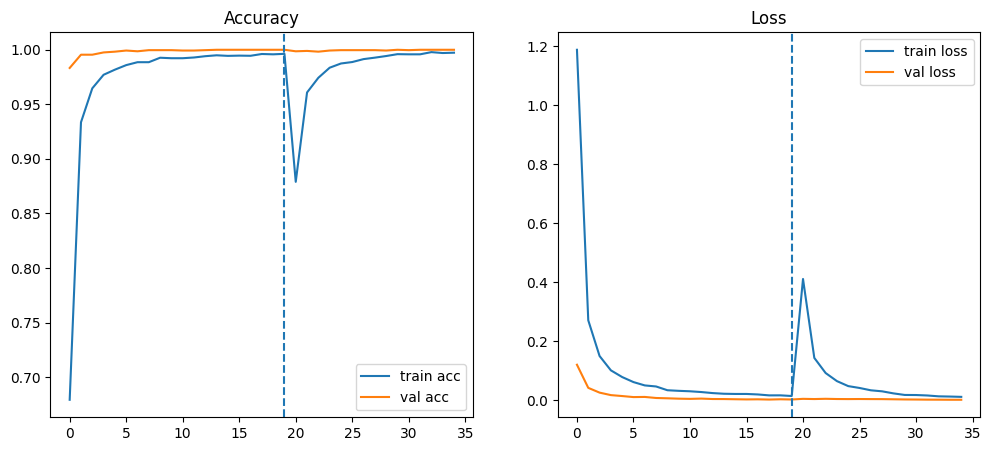

In [8]:
# ---- 3) Ortam ayarları ----
import os
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

# Colab GPU belleğini büyüme moduna al
physical_devices = tf.config.list_physical_devices('GPU')
for dev in physical_devices:
    tf.config.experimental.set_memory_growth(dev, True)

# ---- 4) Parametreler ----
# Drive içindeki dataset yolu
DATASET_DIR = '/content/drive/MyDrive/signToText/youtube/ml_dataset'
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
INITIAL_EPOCHS = 20
FINE_TUNING_EPOCHS = 15
MODEL_NAME = 'sign_language_model'
log_dir = "/content/drive/MyDrive/signToText/youtube/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# ---- 5) Model oluşturma fonksiyonu ----
def create_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False,
                             input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=outputs), base_model

# ---- 6) Veri jeneratörleri ----
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.8,1.2),
    zoom_range=0.15,
    horizontal_flip=False,
    fill_mode='constant', cval=0
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR,'train'),
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR,'validation'),
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR,'test'),
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# ---- 7) Sınıf indekslerini kaydet ----
class_indices = train_generator.class_indices
with open('/content/drive/MyDrive/signToText/class_indices.json','w') as f:
    json.dump(class_indices, f)

print("Classes:", class_indices)

# ---- 8) Model, callback’ler ----
model, base_model = create_model(len(class_indices))

callbacks = [
    ModelCheckpoint(f'/content/drive/MyDrive/signToText/{MODEL_NAME}_best.h5',
                    monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1),
    TensorBoard(log_dir=log_dir, histogram_freq=1)
]

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# ---- 9) Phase 1: Başluk eğitimi ----
history1 = model.fit(
    train_generator,
    epochs=INITIAL_EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks
)
model.save(f'/content/drive/MyDrive/signToText/{MODEL_NAME}_phase1.h5')

# ---- 10) Phase 2: Fine-tuning ----
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(
    train_generator,
    epochs=FINE_TUNING_EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks
)
model.save(f'/content/drive/MyDrive/signToText/{MODEL_NAME}_final.h5')

# ---- 11) Test set değerlendirme ----
loss, acc = model.evaluate(test_generator)
print(f'Test accuracy: {acc:.4f}')

# ---- 12) Eğitim grafikleri ----
acc_tot = history1.history['accuracy'] + history2.history['accuracy']
val_acc_tot = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss_tot = history1.history['loss'] + history2.history['loss']
val_loss_tot = history1.history['val_loss'] + history2.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc_tot, label='train acc')
plt.plot(val_acc_tot, label='val acc')
plt.axvline(x=INITIAL_EPOCHS-1, linestyle='--')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(loss_tot, label='train loss')
plt.plot(val_loss_tot, label='val loss')
plt.axvline(x=INITIAL_EPOCHS-1, linestyle='--')
plt.legend(); plt.title('Loss')
plt.show()